***Emma Arenas Villaverde***
***

# Netflix Dataset Analysis
The `netflix-titles` dataset is 

## Data Preparation and Cleaning

### Importing Libraries

In [ ]:
install.packages("readr") # to read CSV files
install.packages("dplyr") # for data manipulation
install.packages("lubridate") # for 
install.packages("ggplot2")
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)

###  Loading Dataset

In [2]:
netflix_titles <- read.csv2("../data/netflix-titles.csv")

### Data Overview

In [3]:
dim(netflix_titles) # to obtain its dimensions

[1] 8811   12

In [4]:
str(netflix_titles) # to see its internal structure

'data.frame':	8811 obs. of  12 variables:
 $ show_id     : chr  "s1" "s2" "s3" "s4" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ director    : chr  "Kirsten Johnson" "" "Julien Leclercq" "" ...
 $ cast        : chr  "" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "" ...
 $ country     : chr  "United States" "South Africa" "" "" ...
 $ date_added  : chr  "September 25, 2021" "September 24, 2021" "September 24, 2021" "September 24, 2021" ...
 $ release_year: chr  "2020" "2021" "2021" "2021" ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ listed_in   : chr  "Documentarie

In [5]:
head(netflix_titles) # to view its first six rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
2,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
4,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
5,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


### Removing Unwanted Columns

In [6]:
netflix_titles$show_id <- NULL
netflix_titles$description <- NULL
netflix_titles$date_added <- NULL

In [7]:
names(netflix_titles)

[1] "type"         "title"        "director"     "cast"         "country"     
[6] "release_year" "rating"       "duration"     "listed_in"

#### Rearrancing Columns

In [8]:
netflix_titles <- netflix_titles[,c("title","type","release_year", "country", "director","cast", "duration", "rating","listed_in")]

In [9]:
names(netflix_titles)

[1] "title"        "type"         "release_year" "country"      "director"    
[6] "cast"         "duration"     "rating"       "listed_in"

### Detection of Duplicate Record

In [10]:
sum(duplicated(netflix_titles))

[1] 3

In [11]:
netflix_titles <- netflix_titles %>% distinct() # función de la librería dplyr para borrar duplicados

In [12]:
sum(duplicated(netflix_titles))

[1] 0

### Checking Missing Values

In [ ]:
# Convertir todas las cadenas vacías en NA para todo el dataframe
netflix_titles <- netflix_titles %>% 
  mutate(across(everything(), na_if, ""))

In [14]:
missing_values <- any(is.na(netflix_titles))
missing_values

[1] TRUE

In [15]:
# Contar valores faltantes en cada columna
netflix_titles %>%
  summarise(across(everything(), ~sum(is.na(.))))

title,type,release_year,country,director,cast,duration,rating,listed_in
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,2,832,2635,826,5,6,3


#### Fixing Missing Values

In [18]:
netflix_titles$title[is.na(netflix_titles$title)] <- "Unknown title"
netflix_titles$type[is.na(netflix_titles$type)] <- "Unknown type"
netflix_titles$release_year[is.na(netflix_titles$release_year)] <- "Unknown year"
netflix_titles$country[is.na(netflix_titles$country)] <- "Unknown country"
netflix_titles$director[is.na(netflix_titles$director)] <- "Unknown director"
netflix_titles$cast[is.na(netflix_titles$cast)] <- "Unknown cast"
netflix_titles$duration[is.na(netflix_titles$duration)] <- "Unknown duration"
netflix_titles$rating[is.na(netflix_titles$rating)] <- "Unknown rating"
netflix_titles$listed_in[is.na(netflix_titles$listed_in)] <- "Unknown list"

In [19]:
netflix_titles %>%
  summarise(across(everything(), ~sum(is.na(.))))

title,type,release_year,country,director,cast,duration,rating,listed_in
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


### Changing Data Type of Columns

In [20]:
netflix_titles$release_year <- as.numeric(netflix_titles$release_year)
str(netflix_titles$release_year) # "Unknow year" pasa a ser NA de nuevo

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


 num [1:8808] 2020 2021 2021 2021 2021 ...


In [21]:
str(netflix_titles)

'data.frame':	8808 obs. of  9 variables:
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ release_year: num  2020 2021 2021 2021 2021 ...
 $ country     : chr  "United States" "South Africa" "Unknown country" "Unknown country" ...
 $ director    : chr  "Kirsten Johnson" "Unknown director" "Julien Leclercq" "Unknown director" ...
 $ cast        : chr  "Unknown cast" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "Unknown cast" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ listed_in   : chr  "Documentaries" "International TV Shows, TV Dramas, TV Mysteries" "Crime TV Shows, Inte

### Creating new column a partir de duration

In [22]:
# Crear dos nuevas columnas inicializadas con NA
netflix_titles$duration_min <- NA
netflix_titles$seasons <- NA

# Para duraciones en minutos
is_minutes <- grepl("min$", netflix_titles$duration)
netflix_titles$duration_min[is_minutes] <- as.numeric(gsub(" min", "", netflix_titles$duration[is_minutes]))

# Para duraciones en temporadas
is_seasons <- grepl("Seasons?$", netflix_titles$duration)
netflix_titles$seasons[is_seasons] <- as.numeric(gsub(" Seasons?", "", netflix_titles$duration[is_seasons]))

In [25]:
netflix_titles$duration <- NULL
head(netflix_titles)

,title,type,release_year,country,director,cast,rating,listed_in,duration_min,seasons
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Dick Johnson Is Dead,Movie,2020,United States,Kirsten Johnson,Unknown cast,PG-13,Documentaries,90,NA
2,Blood & Water,TV Show,2021,South Africa,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",TV-MA,"International TV Shows, TV Dramas, TV Mysteries",NA,2
3,Ganglands,TV Show,2021,Unknown country,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",TV-MA,"Crime TV Shows, International TV Shows, TV Action & Adventure",NA,1
4,Jailbirds New Orleans,TV Show,2021,Unknown country,Unknown director,Unknown cast,TV-MA,"Docuseries, Reality TV",NA,1
5,Kota Factory,TV Show,2021,India,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",TV-MA,"International TV Shows, Romantic TV Shows, TV Comedies",NA,2
6,Midnight Mass,TV Show,2021,Unknown country,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",TV-MA,"TV Dramas, TV Horror, TV Mysteries",NA,1


### Preview of Data

In [26]:
dim(netflix_titles)

[1] 8808   10

In [28]:
glimpse(netflix_titles)

Rows: 8,808
Columns: 10
$ title        <chr> "Dick Johnson Is Dead", "Blood & Water", "Ganglands", "Ja…
$ type         <chr> "Movie", "TV Show", "TV Show", "TV Show", "TV Show", "TV …
$ release_year <dbl> 2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 202…
$ country      <chr> "United States", "South Africa", "Unknown country", "Unkn…
$ director     <chr> "Kirsten Johnson", "Unknown director", "Julien Leclercq",…
$ cast         <chr> "Unknown cast", "Ama Qamata, Khosi Ngema, Gail Mabalane, …
$ rating       <chr> "PG-13", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "PG…
$ listed_in    <chr> "Documentaries", "International TV Shows, TV Dramas, TV M…
$ duration_min <dbl> 90, NA, NA, NA, NA, NA, 91, 125, NA, 104, NA, NA, 127, 91…
$ seasons      <dbl> NA, 2, 1, 1, 2, 1, NA, NA, 9, NA, 1, 1, NA, NA, 1, 4, NA,…


## Análisis Exploratorio (EDA)

### Análisis Estadístico

In [34]:
summary(netflix_titles$release_year)
summary(netflix_titles$duration_min)
summary(netflix_titles$seasons)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1925    2013    2017    2014    2019    2024       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   87.00   98.00   99.58  114.00  312.00    2682 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   1.000   1.765   2.000  17.000    6132 

#### Correlaciones

La correlación entre release_year y seasons podría tener sentido si estás investigando si las series más recientes tienden a tener más o menos temporadas en comparación con las series más antiguas. Por ejemplo, podrías tener una hipótesis de que las series de televisión han aumentado o disminuido en número de temporadas con el paso del tiempo.

In [36]:
# Usa na.omit para excluir valores NA que podrían interferir con la correlación
clean_data <- na.omit(netflix_titles[, c("release_year", "seasons")])

# Calcula el coeficiente de correlación
correlation <- cor(clean_data$release_year, clean_data$seasons)

# Muestra el coeficiente de correlación
correlation

[1] -0.09035584

The correlation analysis between the release year of Netflix series and the number of seasons yielded a correlation coefficient of approximately -0.09. This value indicates a very weak negative linear relationship, suggesting that there is no significant trend that newer series have more or fewer seasons compared to older ones. The weak correlation implies that as the years progress, the number of seasons for series does not consistently increase or decrease in any meaningful way. Given the lack of a strong relationship, it might be more productive to explore other potential factors that could influence the number of seasons a series gets, or to consider different types of statistical analyses that could uncover non-linear relationships or interactions with other variables.

#### Detección de valores atípicos

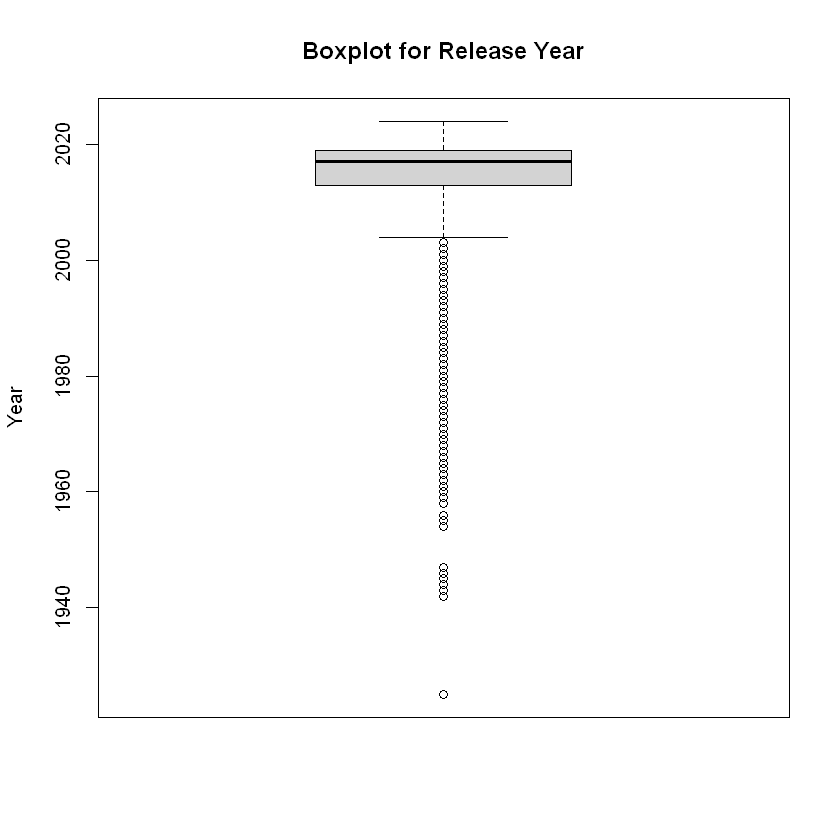

In [39]:
boxplot(netflix_titles$release_year, main="Boxplot for Release Year", ylab="Year")

The boxplot for the release year of titles on Netflix demonstrates a concentration of release dates primarily between the late 1990s and the present, with the bulk of the data lying comfortably within this range. The median release year, indicated by the line within the box, appears to be around the early 2010s, suggesting that the median title available on Netflix was released during that time. Notably, there are several points that fall below the bottom whisker, which extend down to around the 1940s or potentially earlier. These points are likely to be considered outliers, representing a small number of titles that were released significantly earlier than the majority. The presence of these outliers indicates that while Netflix's catalog is mainly composed of more recent releases, it does also contain a selection of much older titles.

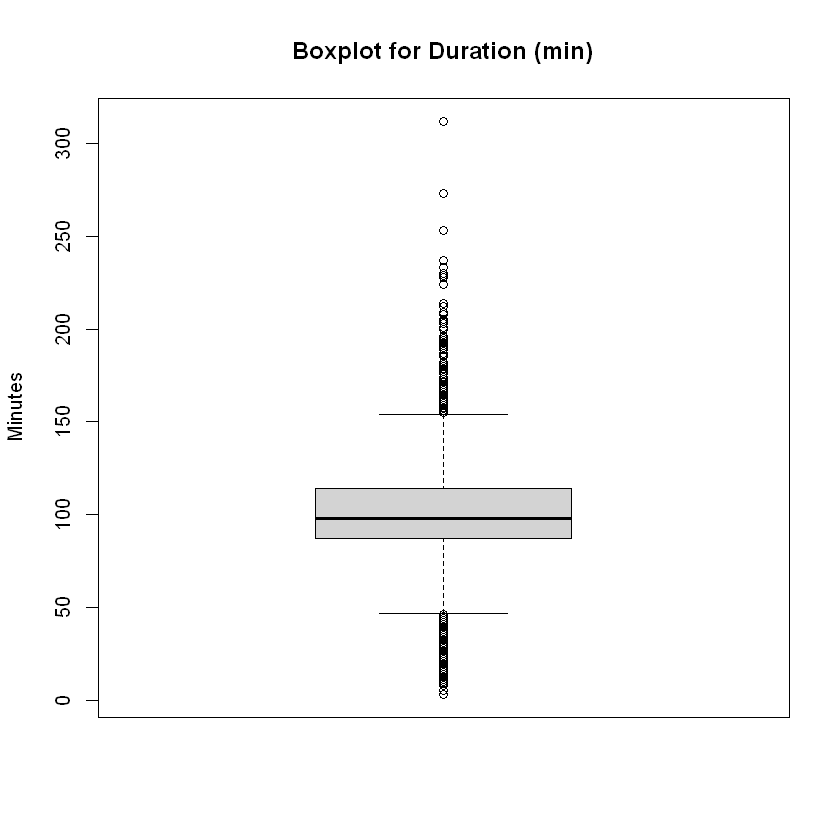

In [40]:
boxplot(netflix_titles$duration_min, main="Boxplot for Duration (min)", ylab="Minutes")

The boxplot for the duration of Netflix titles shows the spread of the length of movies and possibly single episodes of series. The median duration, represented by the line within the box, is approximately at 100 minutes, which is typical for the length of a standard feature film. The interquartile range, depicted by the box itself, is quite narrow, suggesting that a significant number of Netflix titles cluster around this median duration. However, there is a substantial number of outliers, which are indicated by the individual points above the upper whisker. These outliers suggest that there are several titles significantly longer than the average, potentially including extended films or collections of episodes grouped as one title. The lower whisker doesn't extend very far, indicating there are relatively few titles with very short durations. Overall, this distribution with its outliers reveals the presence of a diverse range of content lengths on Netflix, although the majority tend to be around the typical length of a movie.

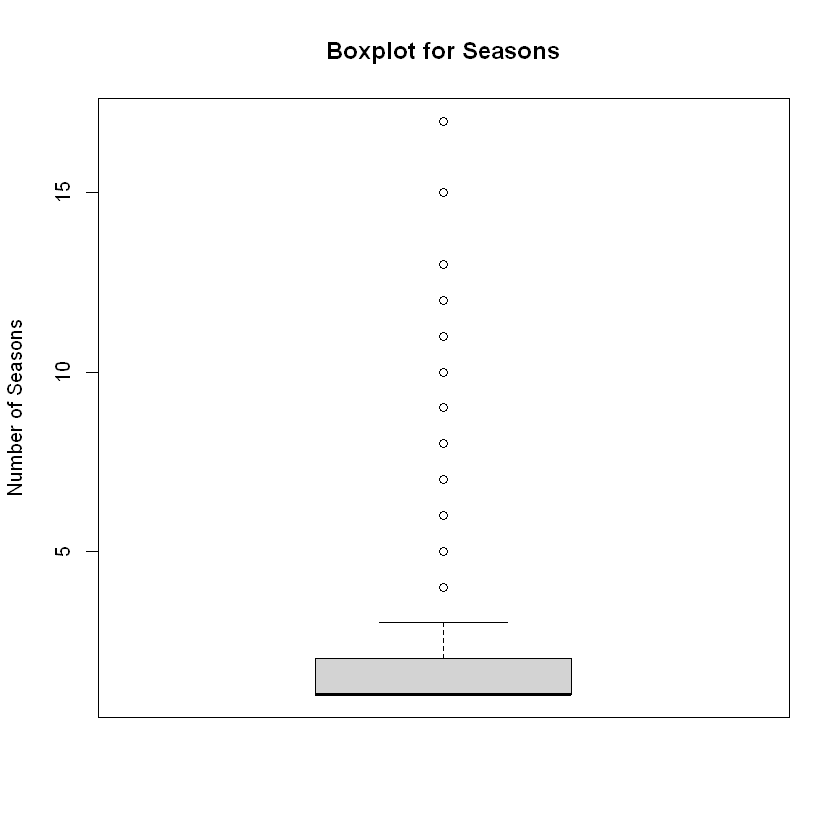

In [41]:
boxplot(netflix_titles$seasons, main="Boxplot for Seasons", ylab="Number of Seasons")

The boxplot for the number of seasons of series on Netflix indicates that the majority of series have a relatively small number of seasons, with the median at or just above 1 season, which is in line with the common practice of initially commissioning a single season for new series. The interquartile range is tight, implying that most series do not deviate far from this median number. However, the considerable number of outliers above the upper whisker highlights that there are series with many more seasons available. This suggests that while Netflix tends to offer series with fewer seasons, there is also a selection of long-running series in its catalog. The existence of these outliers may reflect a few classic or particularly successful series that have been renewed multiple times.

### Análisis Visual

In [ ]:
install.packages("ggplot2")
library(ggplot2)

#### Distribución de películas frente a series

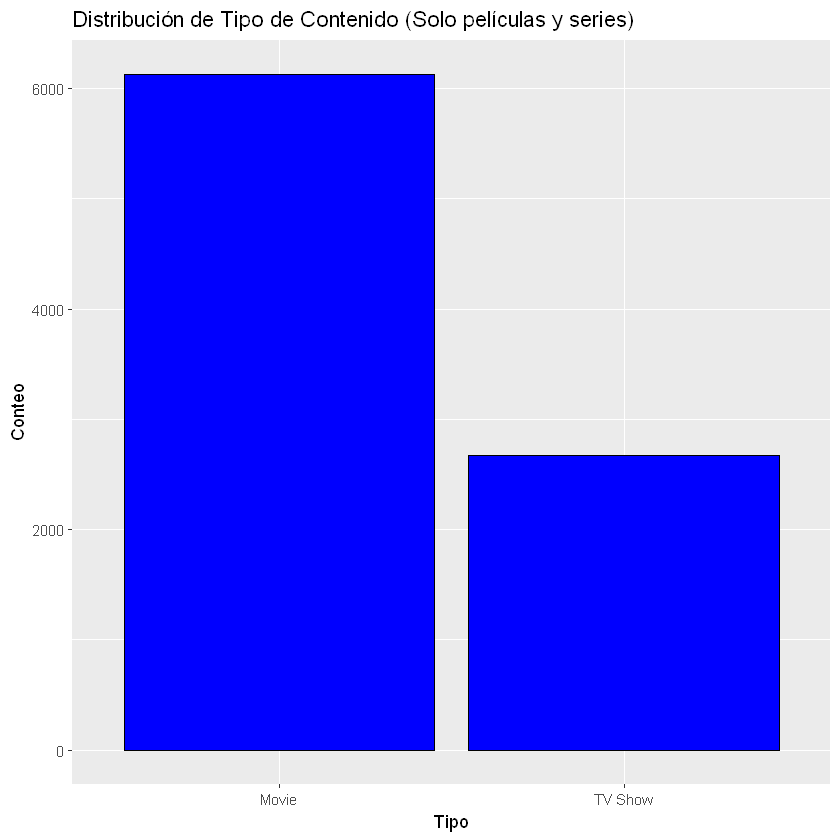

In [44]:
# Filtrar solo para 'Movie' o 'TV Show'
netflix_titles_filtered <- netflix_titles %>% 
  filter(type %in% c("Movie", "TV Show"))

# Ahora crearemos el gráfico solo con estos dos tipos.
ggplot(netflix_titles_filtered, aes(x = type)) +
  geom_bar(fill = 'blue', color = 'black') +
  labs(title = "Distribución de Tipo de Contenido (Solo películas y series)", x = "Tipo", y = "Conteo")

#### Tendencias a lo largo del tiempo:


Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


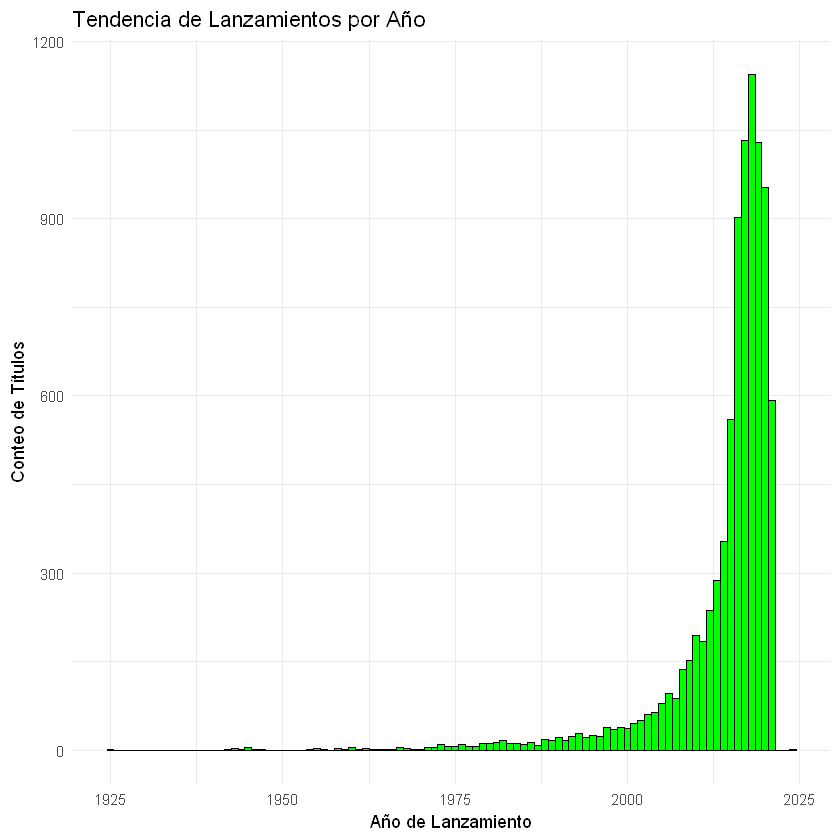

In [45]:
ggplot(netflix_titles, aes(x = as.numeric(release_year))) +
  geom_histogram(binwidth = 1, fill = 'green', color = 'black') +
  labs(title = "Tendencia de Lanzamientos por Año", x = "Año de Lanzamiento", y = "Conteo de Títulos") +
  theme_minimal()

#### Distribución por país:


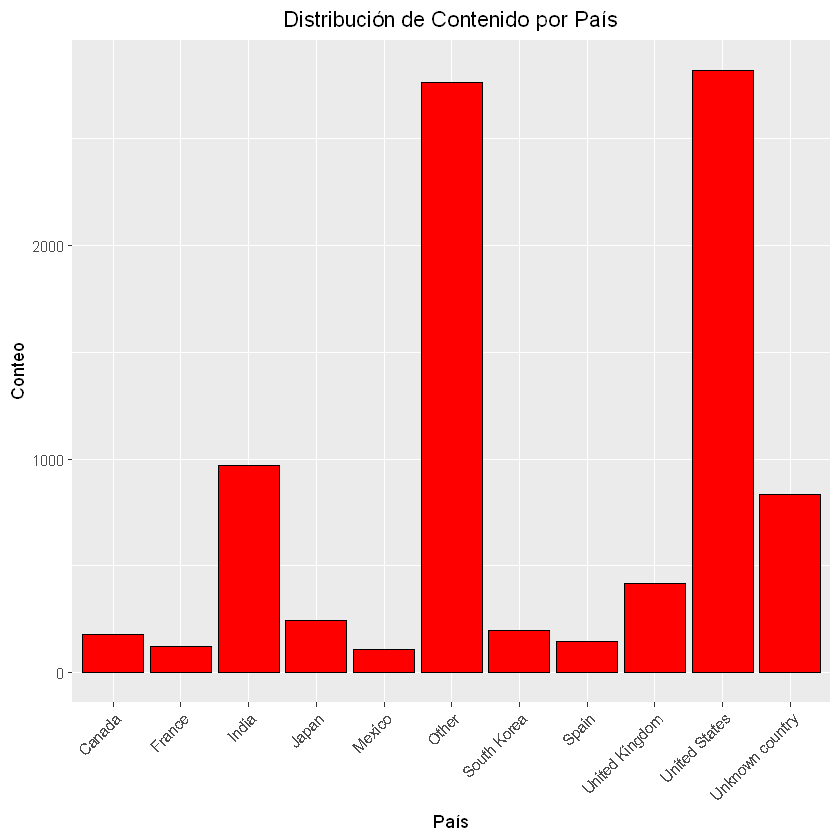

In [50]:
top_countries <- netflix_titles %>%
  count(country) %>%
  top_n(10, n) %>%
  pull(country)

netflix_titles_filtered <- netflix_titles %>%
  mutate(country = ifelse(country %in% top_countries, country, 'Other'))

ggplot(netflix_titles_filtered, aes(x = country)) +
  geom_bar(fill = 'red', color = 'black') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribución de Contenido por País", x = "País", y = "Conteo") +
  theme(plot.title = element_text(hjust = 0.5)) # Centrar el título

#### Duración del contenido:

Warning message:
"Removed 4 rows containing non-finite outside the scale range (`stat_bin()`)."


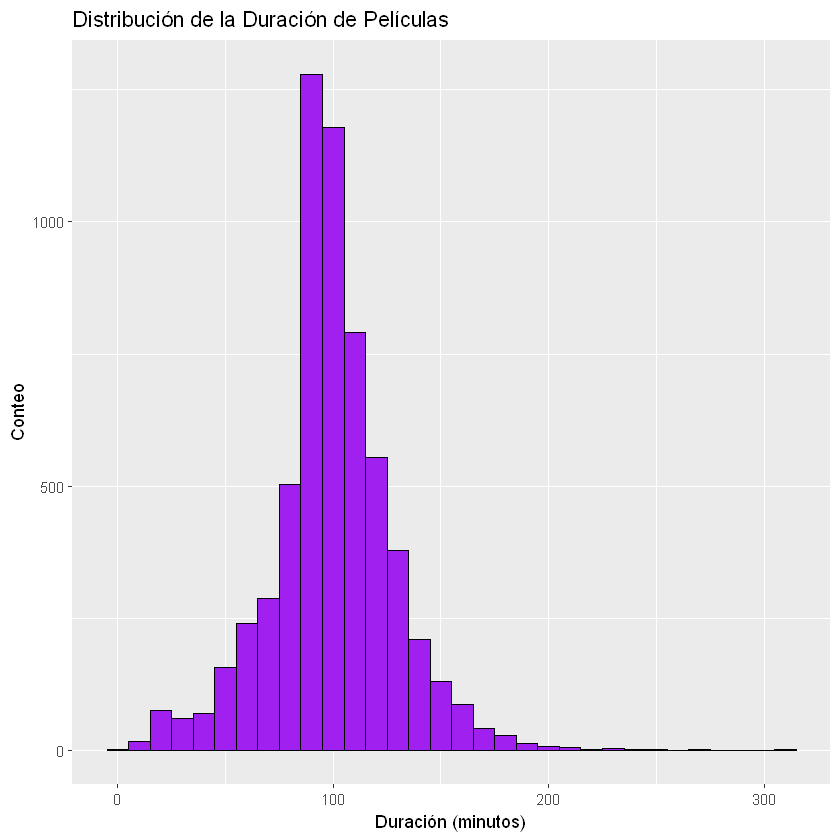

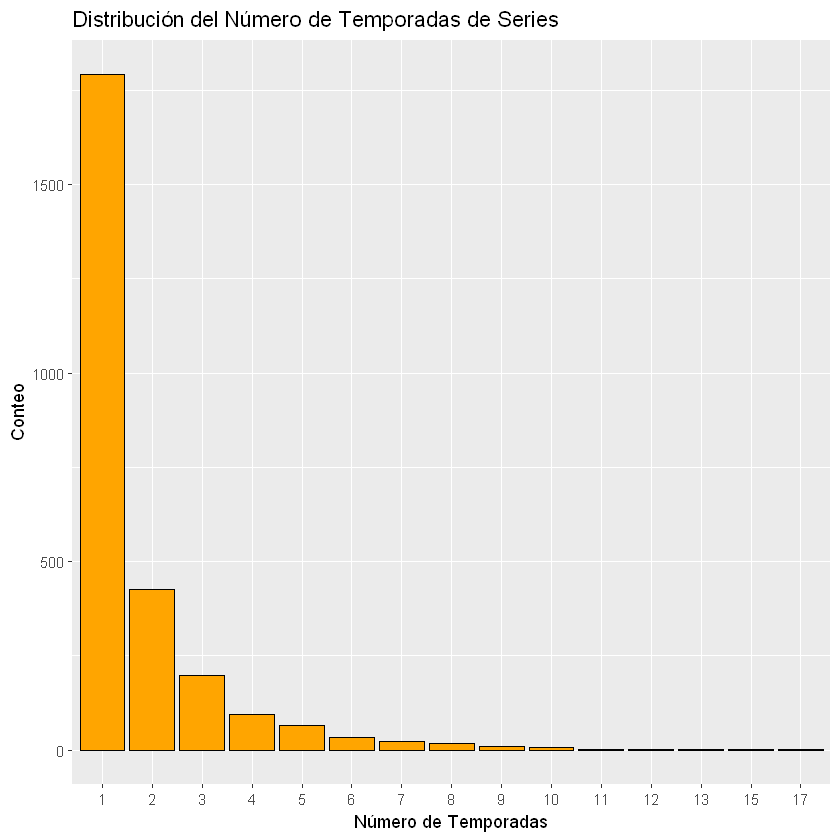

In [47]:
# Histograma para películas
ggplot(subset(netflix_titles, type == "Movie"), aes(x = duration_min)) +
  geom_histogram(binwidth = 10, fill = 'purple', color = 'black') +
  labs(title = "Distribución de la Duración de Películas", x = "Duración (minutos)", y = "Conteo")

# Barplot para series, mostrando las temporadas
ggplot(subset(netflix_titles, type == "TV Show"), aes(x = as.factor(seasons))) +
  geom_bar(fill = 'orange', color = 'black') +
  labs(title = "Distribución del Número de Temporadas de Series", x = "Número de Temporadas", y = "Conteo")

#### Calificaciones y su relación con otros factores:

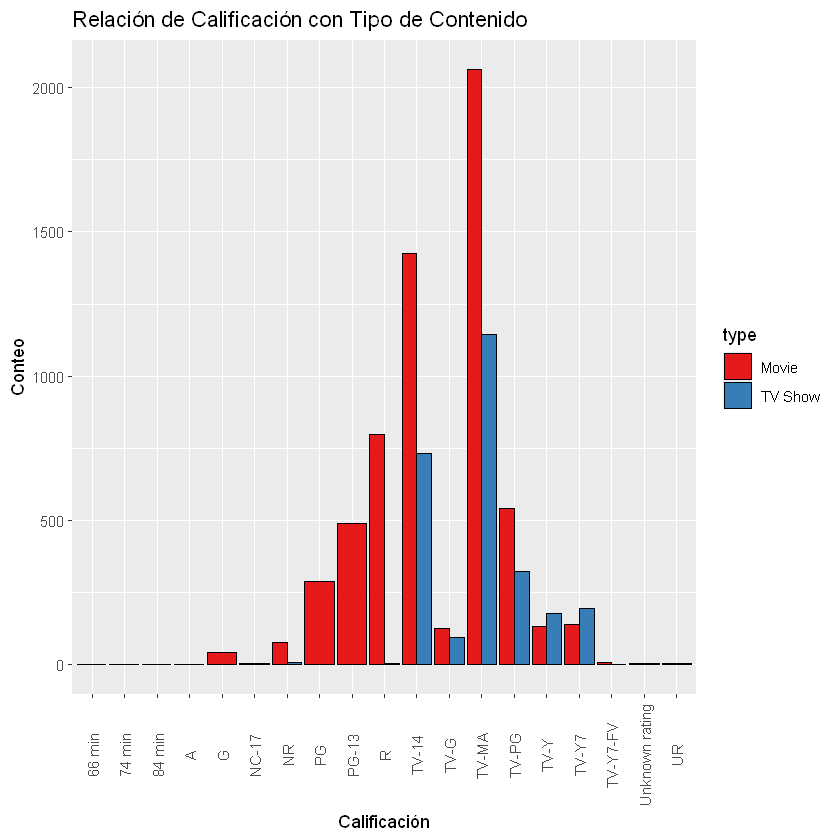

In [57]:
# Asegurarse de que netflix_titles_filtered sólo tenga 'Movie' y 'TV Show'
netflix_titles_filtered <- netflix_titles_filtered %>%
  filter(type %in% c("Movie", "TV Show"))

# Crear el gráfico con el dataframe filtrado
ggplot(netflix_titles_filtered, aes(x = rating, fill = type)) +
  geom_bar(position = "dodge", color = 'black') +
  labs(title = "Relación de Calificación con Tipo de Contenido", x = "Calificación", y = "Conteo") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
  scale_fill_brewer(palette = "Set1") # Usar una paleta de colores mejor